# Lab Work 3: Classification of Image Data

## 1 Load the MNIST Data-Set
* get the data using code below
* assemble information on number of images, size of images, distribution among different classes

In [1]:
from sklearn.datasets import fetch_openml
from math import sqrt

In [3]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True)

/home/chris/WS2324/bda2/Praktikum/env/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [4]:
X.shape

(70000, 784)

In [5]:
# Data about the dataset
num_images = X.shape[0]
image_size = X.shape[1]
print(f"Number of images: {num_images}")
print(f"Image size: {image_size}")

Number of images: 70000
Image size: 784


In [6]:
import numpy as np
# Distribution among different classes (labels)
class_distribution = np.bincount(y.astype(int))
for digit, count in enumerate(class_distribution):
    print(f"{digit} has {count} images.")

0 has 6903 images.
1 has 7877 images.
2 has 6990 images.
3 has 7141 images.
4 has 6824 images.
5 has 6313 images.
6 has 6876 images.
7 has 7293 images.
8 has 6825 images.
9 has 6958 images.


## 2 Visualize the input data
* Display at least two images for each class in the dataset
* Show the class identity per image

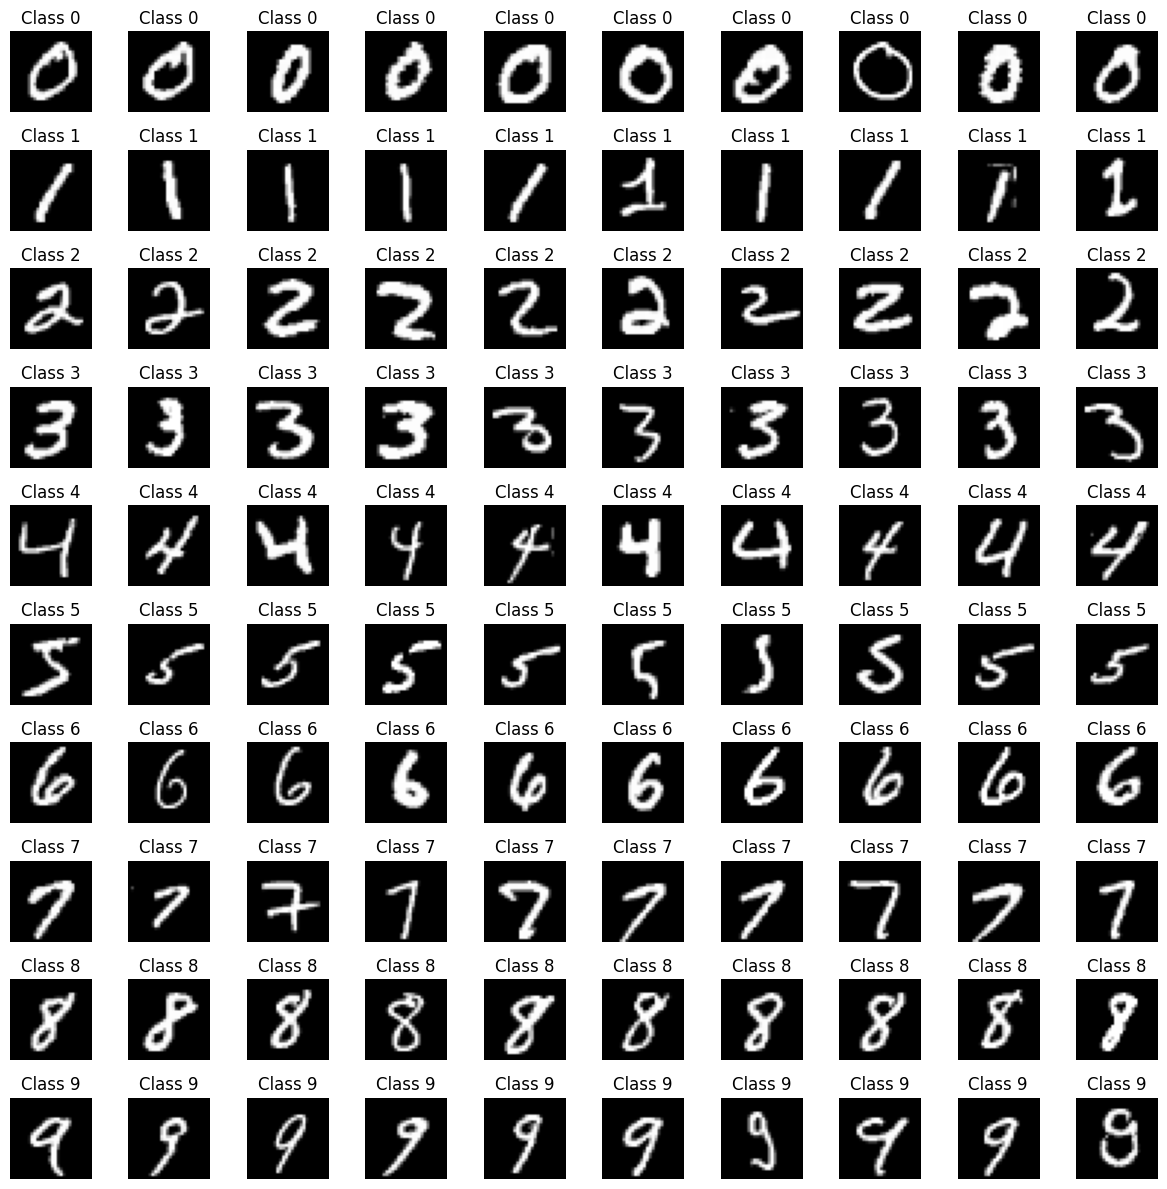

In [7]:
import matplotlib.pyplot as plt

X = np.array(X)
y = np.array(y, dtype=int)

# Define the number of images to display for each class
images_per_class = 10

# Initialize a figure for plotting
fig, axes = plt.subplots(10, images_per_class, figsize=(12, 12))

# Iterate over each digit (class)
for digit in range(10):
    # Get indices of images for the current digit
    indices = np.where(y == digit)[0][:images_per_class]

    # Iterate over the selected images for the current digit
    for i, index in enumerate(indices):
        # Reshape the image to its original shape (28x28)
        image = X[index].reshape(28, 28)

        # Plot the image on the corresponding subplot
        axes[digit, i].imshow(image, cmap='gray')
        axes[digit, i].axis('off')
        axes[digit, i].set_title(f"Class {digit}")

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

## 3 Train a k-NN Classifier and Check the Performance

### 3.1 Import the required modules for classifier and performance measurement

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

### 3.2 Train the classifier using 3-fold cross_validation 
* create a training and testing set
* train the classifer with cross_validate, check the documentation: What does cross_validate return?

In [18]:
# Step 1: Create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Train the classifier with cross_validate
knn_classifier = KNeighborsClassifier(n_neighbors=3)  # You can adjust the number of neighbors (n_neighbors) as needed


In [19]:
# Specify the scoring metric(s) you want to use during cross-validation
scoring_metrics = ['accuracy']  # You can add more metrics if needed

# Perform cross-validation
cv_results = cross_validate(knn_classifier, X_train, y_train, cv=3, scoring=scoring_metrics, return_train_score=False)

# Display the cross-validation results
for metric in scoring_metrics:
    print(f"Mean {metric} during cross-validation: {np.mean(cv_results['test_' + metric]):.4f}")

Mean accuracy during cross-validation: 0.9684


`cross_validate` returns a dictionary (cv_results) containing various information about the cross-validation, such as training and test scores.

The cv_results dictionary contains information about each fold's test scores for each specified metric. In the example, we calculate and display the mean accuracy across folds. 

### 3.3 Use the best classifier from the previous run and check with your test set 
* Generate a classification report
* Generate a confusion matrix

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
knn_classifier.fit(X_train, y_train)  # Fit the classifier on the entire training set

# Step 3: Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

In [14]:
# Step 4: Generate a classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)


Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.96      0.99      0.98      1600
           2       0.98      0.96      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.96      0.97      0.97      1503
           8       0.99      0.93      0.96      1357
           9       0.95      0.96      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



In [15]:
# Step 5: Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[1336    0    3    0    0    0    2    1    1    0]
 [   0 1592    2    0    1    1    0    3    0    1]
 [   7   17 1323    1    4    1    5   17    3    2]
 [   0    2   12 1384    1    8    2    7    7   10]
 [   3    8    1    0 1251    0    2    3    1   26]
 [   2    5    0   16    2 1232   13    0    1    2]
 [   5    1    0    0    5    6 1379    0    0    0]
 [   1   21    4    0    4    0    0 1458    1   14]
 [   4   13    6   22    2   19    4   10 1267   10]
 [   6    5    2   11   19    0    0   17    1 1359]]


# 4 Train a Decision Tree Classifier and Check the Performance

In [21]:
from sklearn.tree import DecisionTreeClassifier

X = np.array(X)
y = np.array(y, dtype=int)

# Step 1: Create a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.1 Train the classifier using 3-fold cross_validation

In [23]:
# Step 2: Train the Decision Tree classifier with cross_validate
dt_classifier = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters as needed
dt_classifier.fit(X_train, y_train)

# Specify the scoring metric(s) you want to use during cross-validation
scoring_metrics = ['accuracy']  # You can add more metrics if needed

### 4.2 Check the performance with your test set

In [24]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

# Generate a classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report (Decision Tree):\n", classification_rep_dt)

# Generate a confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_dt)

Classification Report (Decision Tree):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      1343
           1       0.94      0.95      0.95      1600
           2       0.87      0.83      0.85      1380
           3       0.83      0.84      0.83      1433
           4       0.84      0.87      0.85      1295
           5       0.83      0.82      0.82      1273
           6       0.90      0.90      0.90      1396
           7       0.91      0.90      0.91      1503
           8       0.80      0.80      0.80      1357
           9       0.84      0.84      0.84      1420

    accuracy                           0.87     14000
   macro avg       0.87      0.87      0.87     14000
weighted avg       0.87      0.87      0.87     14000


Confusion Matrix (Decision Tree):
 [[1239    4   16    8    7   17   23    3   19    7]
 [   1 1520    7   12   13    4    6   11   22    4]
 [  21   20 1144   45   19   14   25   26   48   18]
 [  11

## 5 Improve with random forests

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
# Train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust hyperparameters as needed
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

In [27]:
# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)
print("Classification Report (Random Forest):\n", classification_rep_rf)

# Generate a confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion Matrix (Random Forest):\n", conf_matrix_rf)

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000


Confusion Matrix (Random Forest):
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1

## 6 Further improvement: Gradient Boosting (Random Forests)

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [38]:
# Train the Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(n_estimators=10, random_state=0)  # You can adjust hyperparameters as needed
gb_classifier.fit(X_train, y_train)

# THIS ACTUALLY WORKS, IT JUST NEEDS TIME TO RUN

GradientBoostingClassifier(n_estimators=10, random_state=0)

In [39]:
# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

In [40]:
# Generate a classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)
print("Classification Report (Gradient Boosting):\n", classification_rep_gb)

# Generate a confusion matrix
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
print("\nConfusion Matrix (Gradient Boosting):\n", conf_matrix_gb)

Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.89      0.93      0.91      1715
           1       0.87      0.95      0.91      1971
           2       0.88      0.84      0.86      1786
           3       0.79      0.81      0.80      1763
           4       0.80      0.84      0.82      1676
           5       0.87      0.65      0.74      1593
           6       0.92      0.85      0.89      1710
           7       0.87      0.82      0.84      1837
           8       0.75      0.79      0.77      1713
           9       0.73      0.81      0.77      1736

    accuracy                           0.83     17500
   macro avg       0.84      0.83      0.83     17500
weighted avg       0.84      0.83      0.83     17500


Confusion Matrix (Gradient Boosting):
 [[1603    1    8    7   12   10    9    4   58    3]
 [   0 1876   20   24    0    3   18    5   24    1]
 [  40   28 1503   37   41    6   28   21   68   14